# Interactive plotting

In this tutorial, we demonstrate basic building blocks how an interactive plot can be built.

In [1]:
import k3d
import discretisedfield as df

p1 = (-5e-9, -5e-9, -2e-9)
p2 = (5e-9, 5e-9, 10e-9)
cell = (1e-9, 1e-9, 1e-9)
mesh = df.Mesh(p1=p1, p2=p2, cell=cell)

value_fun = lambda pos: (pos[0], pos[1], pos[2])

def norm_fun(pos):
    x, y, z = pos
    if x**2 + y**2 < 5e-9**2:
        return 1
    else:
        return 0
    
field = df.Field(mesh, dim=3, value=value_fun, norm=norm_fun)

## `matplotlib` interactive plots

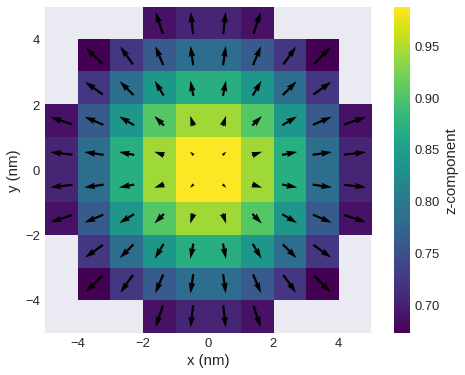

In [2]:
field.plane('z').mpl()

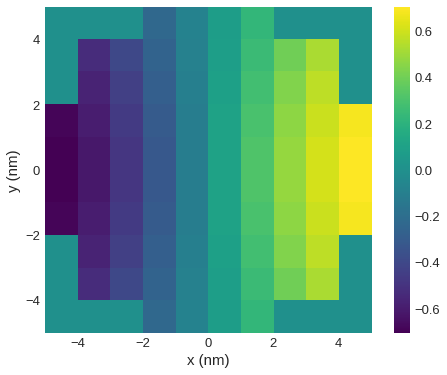

In [3]:
field.x.plane('z').mpl()

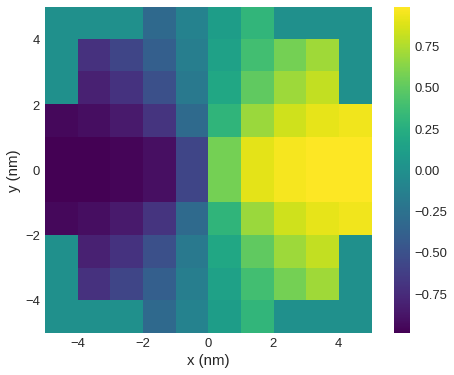

In [4]:
field.x.plane(z=0).mpl()

In [5]:
@df.interact(z=field.mesh.slider('z'))
def myplot(z):
    field.x.plane(z=z).mpl()

interactive(children=(SelectionSlider(description='z (nm)', index=6, options=((-1.5, -1.5000000000000002e-09),…

In [6]:
@df.interact(z=field.mesh.slider('z', continuous_update=False))
def myplot(z):
    field.x.plane(z=z).mpl()

interactive(children=(SelectionSlider(continuous_update=False, description='z (nm)', index=6, options=((-1.5, …

In [7]:
@df.interact(z=field.mesh.slider('z', continuous_update=False),
             component=field.mesh.axis_selector())
def myplot(z, component):
    getattr(field, component).plane(z=z).mpl(figsize=(6, 6))

interactive(children=(SelectionSlider(continuous_update=False, description='z (nm)', index=6, options=((-1.5, …

In [8]:
@df.interact(z=field.mesh.slider('z', continuous_update=False),
             component=field.mesh.axis_selector(widget='radiobuttons', description='component'))
def myplot(z, component):
    getattr(field, component).plane(z=z).mpl(figsize=(6, 6))

interactive(children=(SelectionSlider(continuous_update=False, description='z (nm)', index=6, options=((-1.5, …

In [9]:
@df.interact(z=field.mesh.slider('z', continuous_update=False))
def myplot(z):
    field.plane(z=z).mpl(figsize=(6, 6))

interactive(children=(SelectionSlider(continuous_update=False, description='z (nm)', index=6, options=((-1.5, …

## `k3d` interactive plots

In [10]:
field.plane(z=0).z.k3d_scalar(filter_field=field.norm)

Output()

In [11]:
import k3d

plot1 = k3d.plot()

@df.interact(z=field.mesh.slider('z', continuous_update=True))
def myplot(z):
    field.z.plane(z=z).k3d_scalar(filter_field=field.norm,
                                  interactive_field=field,
                                  plot=plot1)  
    
plot1.display()

interactive(children=(SelectionSlider(description='z (nm)', index=6, options=((-1.5, -1.5000000000000002e-09),…

Output()

In [12]:
plot = k3d.plot()

@df.interact(z=field.mesh.slider('z', continuous_update=True),
             axis=field.mesh.axis_selector())
def myplot(z, axis):
    getattr(field, axis).plane(z=z).k3d_scalar(filter_field=field.norm,
                                               interactive_field=field,
                                               plot=plot)
    
plot.display()

interactive(children=(SelectionSlider(description='z (nm)', index=6, options=((-1.5, -1.5000000000000002e-09),…

Output()

In [13]:
plot = k3d.plot()

@df.interact(y=field.mesh.slider('y', continuous_update=True),
             axis=field.mesh.axis_selector())
def myplot(y, axis):
    field.plane(y=y).k3d_vector(color_field=getattr(field, axis),
                                interactive_field=field,
                                plot=plot)
    
plot.display()

interactive(children=(SelectionSlider(description='y (nm)', index=5, options=((-4.5, -4.5e-09), (-3.5, -3.5e-0…

Output()